# Trabalho 2

## 4.1.6 Regressão linear

Neste notebook está o código relacionado com a regressão linear.

### Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import utilidades as ut

### Inicializações e variáveis

In [2]:
warnings.filterwarnings("ignore")  # Desabilitar warnings.
sns.set(style="whitegrid")
plt.style.use(
    "style/estilo.mplstyle")  # Garantir que se utiliza um estilo definido centralmente e comum a todos os gráficos.
%matplotlib inline

label_encoder = LabelEncoder()

ficheiro = "dados_preparados.csv"
colunas_numericas = ["Idade", "FCV", "NRP", "CA", "FAF", "TUDE", "IMC"]
colunas_classes = ["Genero", "Historico_obesidade_familiar", "FCCAC", "Fumador", "MCC", "CCER", "CBA", "TRANS"]

## Leitura dos dados preparados

In [3]:
dados_trabalho = pd.read_csv(ficheiro)

In [4]:
dados_trabalho

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
0,Feminino,21.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,1.000000,Nao,Transportes_Publicos,Peso_Normal,24.386526
1,Feminino,21.000000,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.000000,Sim,3.000000,0.000000,Ocasionalmente,Transportes_Publicos,Peso_Normal,24.238227
2,Masculino,23.000000,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,1.000000,Frequentemente,Transportes_Publicos,Peso_Normal,23.765432
3,Masculino,27.000000,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.000000,Nao,2.000000,0.000000,Frequentemente,Caminhada,Excesso_Peso_Grau_I,26.851852
4,Masculino,22.000000,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.000000,Nao,0.000000,0.000000,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20.976842,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,1.728139,Nao,1.676269,0.906247,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.901475
2107,Feminino,21.982942,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.005130,Nao,1.341390,0.599270,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.741923
2108,Feminino,22.524036,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.054193,Nao,1.414209,0.646288,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,43.543817
2109,Feminino,24.361936,Sim,Sim,3.0,3.0,Ocasionalmente,Nao,2.852339,Nao,1.139107,0.586035,Ocasionalmente,Transportes_Publicos,Obesidade_Mórbida,44.071535


### Hold-out

**Hold-out** é o processo de dividir um conjunto de dados em 2 sub-conjuntos de forma aleatória, um de maior dimensão que será utilizado para treinar um algoritmo de Machine Learning e o outra para o testar.

| Predictor | Target  |
|-----------|---------|
| Idade     | IMC     |

In [5]:
y = dados_trabalho.IMC
X = dados_trabalho[["Idade"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Apresentar informação sobre os datasets de treino e aprendizagem

In [6]:
ut.titulo("|\t\t\t\tDimensão\t\t\t|")
ut.titulo("|   |\tTreino\t\t|\tTeste\t\t|")
ut.texto(f"| X |\t{X_train.shape}\t|\t{X_test.shape}\t|")
ut.texto(f"| y |\t{y_train.shape}\t\t|\t{y_test.shape}\t\t|")

|				Dimensão			|
|   |	Treino		|	Teste		|
| X |	(1688, 1)	|	(423, 1)	|
| y |	(1688,)		|	(423,)		|


### Inicialização do algoritmo

In [7]:
regr_lin = LinearRegression()

### Treinar o algoritmo

Para o treino utilizamos a função ``fit()``.

In [8]:
regr_lin.fit(X_train, y_train)

LinearRegression()

### 4.1.6 a)

In [9]:
ut.etiqueta_e_valor("Equação da reta:", f" y = {regr_lin.intercept_:.3f} + {regr_lin.coef_[0]:.3f} x")

Equação da reta::  y = 22.115 + 0.306 x


$$y = 0,355 + 0,381x$$

### 4.1.6 b)

(10.0, 52.702406201461315)

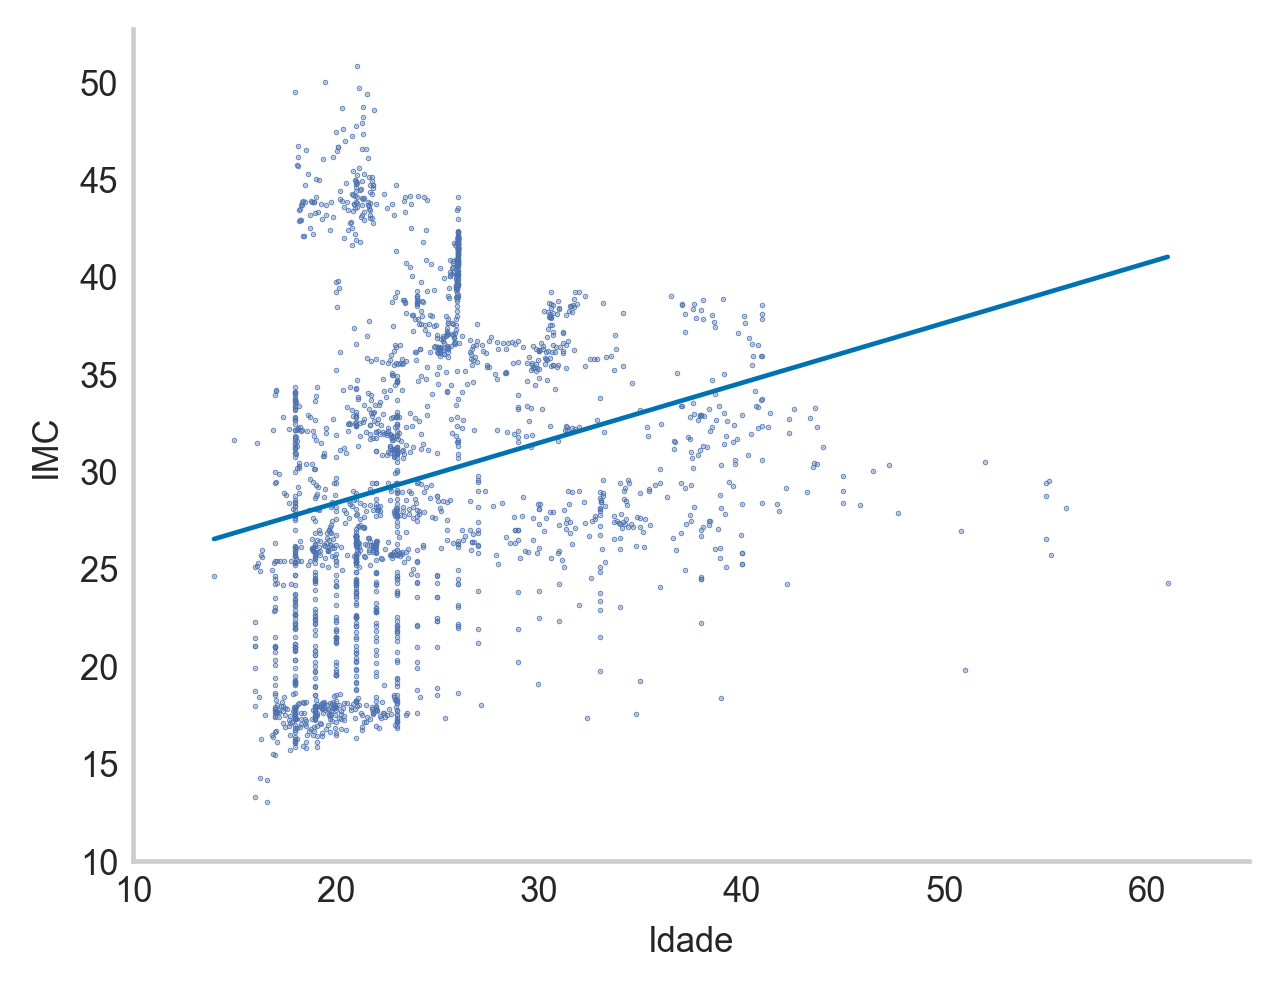

In [10]:
sns.regplot(x="Idade", y="IMC", data=dados_trabalho, order=1, ci=None, scatter_kws={"color": "b", "s": 0.1})
plt.xlim(10, 65)
plt.ylim(ymin=10)

### Aplicar o modelo sobre o conjunto de teste.

In [11]:
y_pred = regr_lin.predict(X_test)

#### MAE

$$MAE = \sum_{i=1}^{D}|x_i-y_i|$$

In [12]:
MAE = np.mean(abs(y_test - y_pred))
ut.etiqueta_e_valor("MAE no conjunto de dados de teste:", f"{MAE:.3f}")

MAE no conjunto de dados de teste:: 6.381


#### RMSE

$$RMSE = \sqrt{\frac{\sum_{i=0}^{N - 1} (y_i - \hat{y}_i)^2}{N}}$$

In [13]:
RMSE = np.sqrt(np.mean((y_test - y_pred) ** 2))
ut.etiqueta_e_valor("RMSE no conjunto de dados de teste:", f"{RMSE:.3f}")

RMSE no conjunto de dados de teste:: 7.776


### Repetir o cálculo mas com outros previsores (preditors)

O preditor vai mudando, podemos ter uma lista com o nome das colunas e fazer um ciclo que realiza os cálculos e guardamos o resultado num dicionário.

TODO: Utilizam-se os atributos base ou os antes do tratamento de dados. 

#### Encoding das classes

In [14]:
for coluna in dados_trabalho.columns:
    dados_trabalho[coluna] = label_encoder.fit_transform(dados_trabalho[coluna].values)

O Target não muda

In [15]:
y = dados_trabalho.IMC

O preditor vai mudando, podemos ter uma lista com o nome das colunas

In [16]:
# lista_preditores = ['Genero', 'Historico_obesidade_familiar', 'FCCAC', 'FCV', 'NRP', 'CCER', 'Fumador', 'CA', 'MCC', 'FAF', 'TUDE', 'CBA', 'TRANS']

lista_preditores = dados_trabalho.columns

### Cálculo

In [17]:
# Resultados
resultados = {}

for preditor in lista_preditores:
    X_preditor = dados_trabalho[[preditor]].to_numpy()
    X_train_1, X_test_1, y_train, y_test = train_test_split(X_preditor, y, train_size=0.8, test_size=0.2,
                                                            random_state=100)
    line_regr = LinearRegression()
    modelo = line_regr.fit(X_train_1, y_train)

    y_pred_1 = line_regr.predict(X_test_1)

    resultados[preditor] = {
        # "X_train": X_train_1,
        # "X_test": X_test_1,
        # "y_train": y_train,
        # "y_test": y_test,
        "modelo": modelo,
        "y_pred": y_pred_1,
        "MAE": np.mean(abs(y_test - y_pred_1)),
        "RMSE": np.sqrt(np.mean((y_test - y_pred_1) ** 2))
    }


### Tabela com os resultados

Uma vez que temos o pandas, podemos utilizar este para apresentar a informação em formato de tabela.


TODO: Agora é preciso analisar os resultados e talvez produzir algum gráfico ou análise estatistica.

In [18]:
resultado = pd.DataFrame(resultados)

resultado.loc[["MAE", "RMSE"]]

,Genero,Idade,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,IMC
MAE,486.566816,438.669429,413.228915,470.367471,471.562418,483.704651,438.353156,486.932539,481.379379,465.224997,481.365566,484.181302,482.870065,486.941622,422.255305,0.0
RMSE,564.76211,518.970702,497.533619,545.514614,545.884662,563.010375,523.423811,565.364024,561.609359,548.582965,556.463949,562.571487,550.349374,564.178774,516.246058,0.0
